<a href="https://colab.research.google.com/github/vmjs1234/TIMEGPT-TABULA-RDL/blob/main/TIME-GPT/time-series-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Time series multivariate colab

https://www.kaggle.com/datasets/atulanandjha/national-stock-exchange-time-series

In [1]:
#| hide
!pip install -Uqq nixtla

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.9 MB/s eta 0:00:00


In [2]:
#| hide
from nixtla.utils import in_colab

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
#| hide
IN_COLAB = in_colab()

In [4]:
#| hide
if not IN_COLAB:
    from nixtla.utils import colab_badge
    from dotenv import load_dotenv

# Multiple series forecasting

TimeGPT provides a robust solution for multi-series forecasting, which involves analyzing multiple data series concurrently, rather than a single one. The tool can be fine-tuned using a broad collection of series, enabling you to tailor the model to suit your specific needs or tasks.

Note that the forecasts are still univariate. This means that although TimeGPT is a global model, it won't consider the inter-feature relationships within the target series. However, TimeGPT does support the use of exogenous variables such as categorical variables (e.g., category, brand), numerical variables (e.g., temperature, prices), or even special holidays.

Let's see this in action.

In [5]:
#| echo: false
if not IN_COLAB:
    load_dotenv()
    colab_badge('docs/tutorials/05_multiple_series')

## 1. Import packages
First, we install and import the required packages and initialize the Nixtla client.

As always, we start off by intializing an instance of `NixtlaClient`.

In [6]:
import pandas as pd
from nixtla import NixtlaClient

In [7]:
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'nixak-fcqNO2C0XCBQQozD5OW6GzOw4wmvrNCoP2xTklrHEThEU8vvytDeHZulh4Ja99fmFgnTyywsPfkVJzxh'
)

In [8]:
#| hide
if not IN_COLAB:
    nixtla_client = NixtlaClient()

## 2. Load the data

The following dataset contains prices of different electricity markets in Europe.

Mutliple series are automatically detected in TimeGPT using the `unique_id` column. This column contains labels for each series. If there are multiple unique values in that column, then it knows it is handling a multi-series scneario.

In this particular case, the `unique_id` column contains the value BE, DE, FR, JPM, and NP.

In [9]:
df = pd.read_csv('infy_stock.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


Let's plot this series using [`NixtlaClient`](https://nixtlaverse.nixtla.io/nixtla/nixtla_client.html#nixtlaclient):

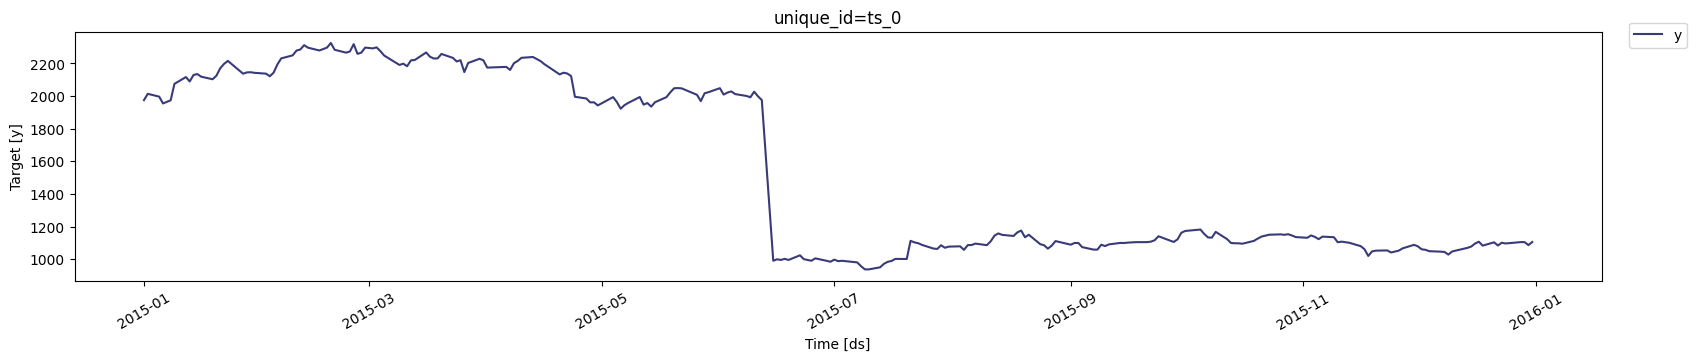

In [10]:
df['ds'] = df['Date']
df['y'] = df['Close']
nixtla_client.plot(df)

## 3. Forecasting Multiple Series

To forecast all series at once, we simply pass the dataframe to the `df` argument. TimeGPt will automatically forecast all series.

In [11]:
import pandas as pd

# 1. Check for irregular or missing timestamps
# Convert 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the difference between consecutive timestamps
time_diffs = df['Date'].diff()

# Check for inconsistent time differences
print(time_diffs.unique())

# If there are inconsistent differences, you need to resample or interpolate
# your data to a regular frequency (e.g., daily, hourly, etc.).

# 2. Check for duplicate timestamps
print(df[df['Date'].duplicated()])

# If there are duplicates, you need to decide how to handle them
# (e.g., remove them, average the values, etc.).

# 3. Resample to a regular frequency (if necessary)
# Example: Resample to daily frequency and fill missing values with forward fill
df = df.set_index('Date').resample('D').ffill().reset_index() # Resample to daily frequency to ensure regularity

# 4. Explicitly specify the frequency when calling forecast
timegpt_fcst_multiseries_df = nixtla_client.forecast(df=df, h=24, level=[80, 90], freq='D') # Replace 'D' with your desired frequency
timegpt_fcst_multiseries_df.head()

<TimedeltaArray>
[NaT, '1 days', '3 days', '4 days', '2 days', '5 days']
Length: 6, dtype: timedelta64[ns]
Empty DataFrame
Columns: [Date, Symbol, Series, Prev Close, Open, High, Low, Last, Close, VWAP, Volume, Turnover, Trades, Deliverable Volume, %Deliverble, ds, y]
Index: []


/usr/local/lib/python3.10/dist-packages/nixtla/nixtla_client.py:360: UserWarning: `df` contains the following exogenous features: ['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'], but `X_df` was not provided and they were not declared in `hist_exog_list`. They will be ignored.
  warnings.warn(


,ds,TimeGPT,TimeGPT-hi-80,TimeGPT-hi-90,TimeGPT-lo-80,TimeGPT-lo-90
0,2016-01-01,1101.5563,1123.1486,1125.1562,1079.9640,1077.9563
1,2016-01-02,1097.9387,1114.2318,1126.3687,1081.6456,1069.5088
2,2016-01-03,1099.8928,1112.7262,1129.9270,1087.0594,1069.8586
3,2016-01-04,1104.2954,1135.9956,1136.8258,1072.5952,1071.7650
4,2016-01-05,1102.8676,1131.5206,1133.4241,1074.2145,1072.3110


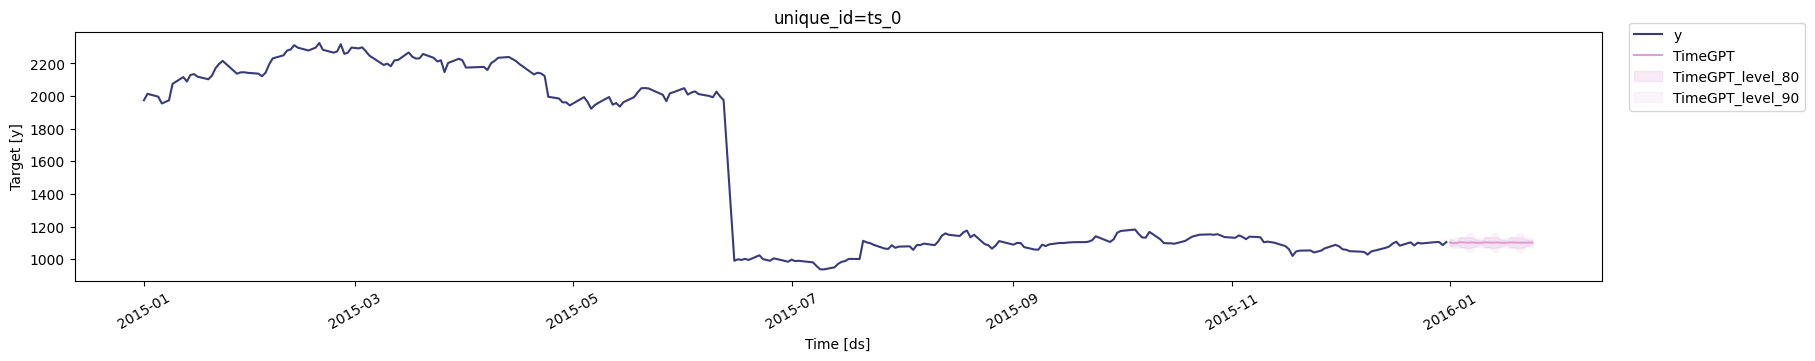

In [13]:
nixtla_client.plot(df, timegpt_fcst_multiseries_df, max_insample_length=365, level=[80, 90])

LONG HORIZON COLAB

In [14]:
!pip install datasetsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 9.0 MB/s eta 0:00:00


#Long-horizon forecasting

In [15]:
from nixtla import NixtlaClient
from datasetsforecast.long_horizon import LongHorizon
from utilsforecast.losses import mae

In [16]:
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'nixak-fcqNO2C0XCBQQozD5OW6GzOw4wmvrNCoP2xTklrHEThEU8vvytDeHZulh4Ja99fmFgnTyywsPfkVJzxh'
)

In [17]:
Y_df, *_ = LongHorizon.load(directory='./', group='ETTh1')

Y_df.head()

100%|██████████| 314M/314M [00:14<00:00, 22.0MiB/s]


,unique_id,ds,y
0,OT,2016-07-01 00:00:00,1.460552
1,OT,2016-07-01 01:00:00,1.161527
2,OT,2016-07-01 02:00:00,1.161527
3,OT,2016-07-01 03:00:00,0.862611
4,OT,2016-07-01 04:00:00,0.525227


In [18]:
test = Y_df[-96:]             # 96 = 4 days x 24h/day
input_seq = Y_df[-1104:-96]

In [19]:


fcst_df = nixtla_client.forecast(
    df=input_seq,
    h=96,
    level=[90],
    finetune_steps=10,
    finetune_loss='mae',
    model='timegpt-1-long-horizon',
    time_col='ds',
    target_col='y'
)

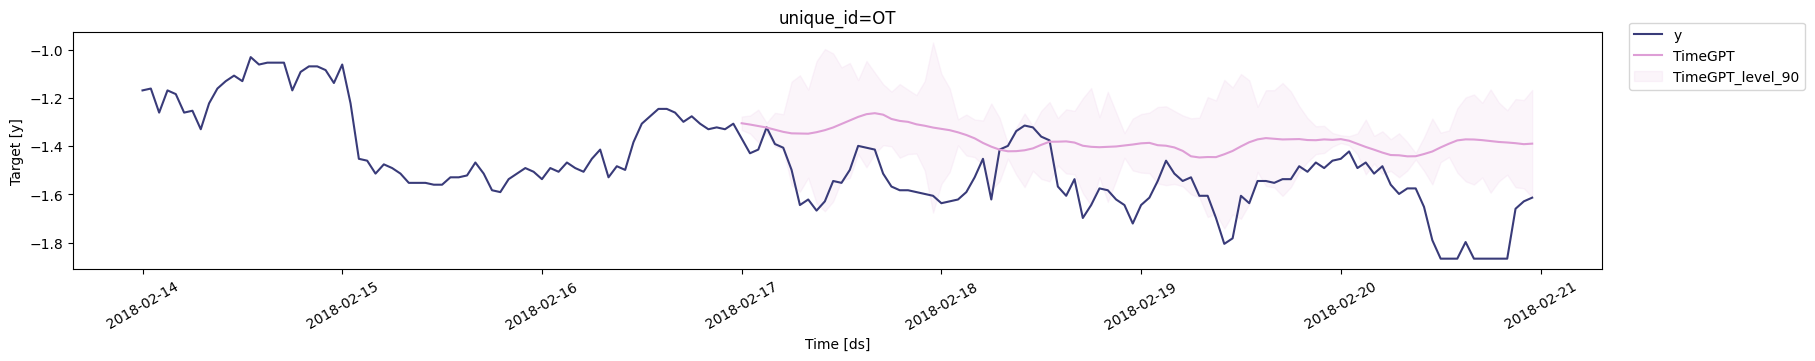

In [20]:
nixtla_client.plot(Y_df[-168:], fcst_df, models=['TimeGPT'], level=[90], time_col='ds', target_col='y')


In [21]:
test = test.copy()

test.loc[:, 'TimeGPT'] = fcst_df['TimeGPT'].values

In [22]:
evaluation = mae(test, models=['TimeGPT'], id_col='unique_id', target_col='y')

print(evaluation)

  unique_id   TimeGPT
0        OT  0.205319


Here, TimeGPT achieves a MAE of 0.205